## Quaternion rotation of an arbitrary axis to z-axis unit vector

In [1]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
import numpy as np
import quaternion
from scipy.spatial.transform import Rotation as R

import math

# !pip install numpy-quaternion

In [2]:
# for interactive view
%matplotlib notebook

In [9]:
# https://github.com/dalek7/umbrella/blob/6901d2774349f46aec566f200d8844c76c40ccc9/MFC/OFMathTest/lib/ofQuaternion.cpp#L68-L142

def makeRotation(v1, v2):
    from scipy.spatial.transform import Rotation as R
   
    v1 = v1 / np.linalg.norm(v1)
    v2 = v2 / np.linalg.norm(v2)
    
#     len1 = np.linalg.norm(v1)
#     len2 = np.linalg.norm(v2)
    
    dot_product = 1.0 + np.dot(v1, v2)
    
    s = math.sqrt(0.5 * dot_product)
    tmp = np.cross(v1, v2) / (2.0 * s)
    
    q = np.quaternion()
    q.x = tmp[0]
    q.y = tmp[1]
    q.z = tmp[2]
    q.w = s
    
    r = R.from_quat([q.x, q.y, q.z, q.w])
    
    return r.as_matrix()

### Example of quaternion of one arbitrary axis

In [33]:
# v1 as an arbitrary axis which is rotated to unit vector of z-axis
v1 = [-0.03, -0.3, 0.5]
v2 = [0, 0, 1]

<IPython.core.display.Javascript object>


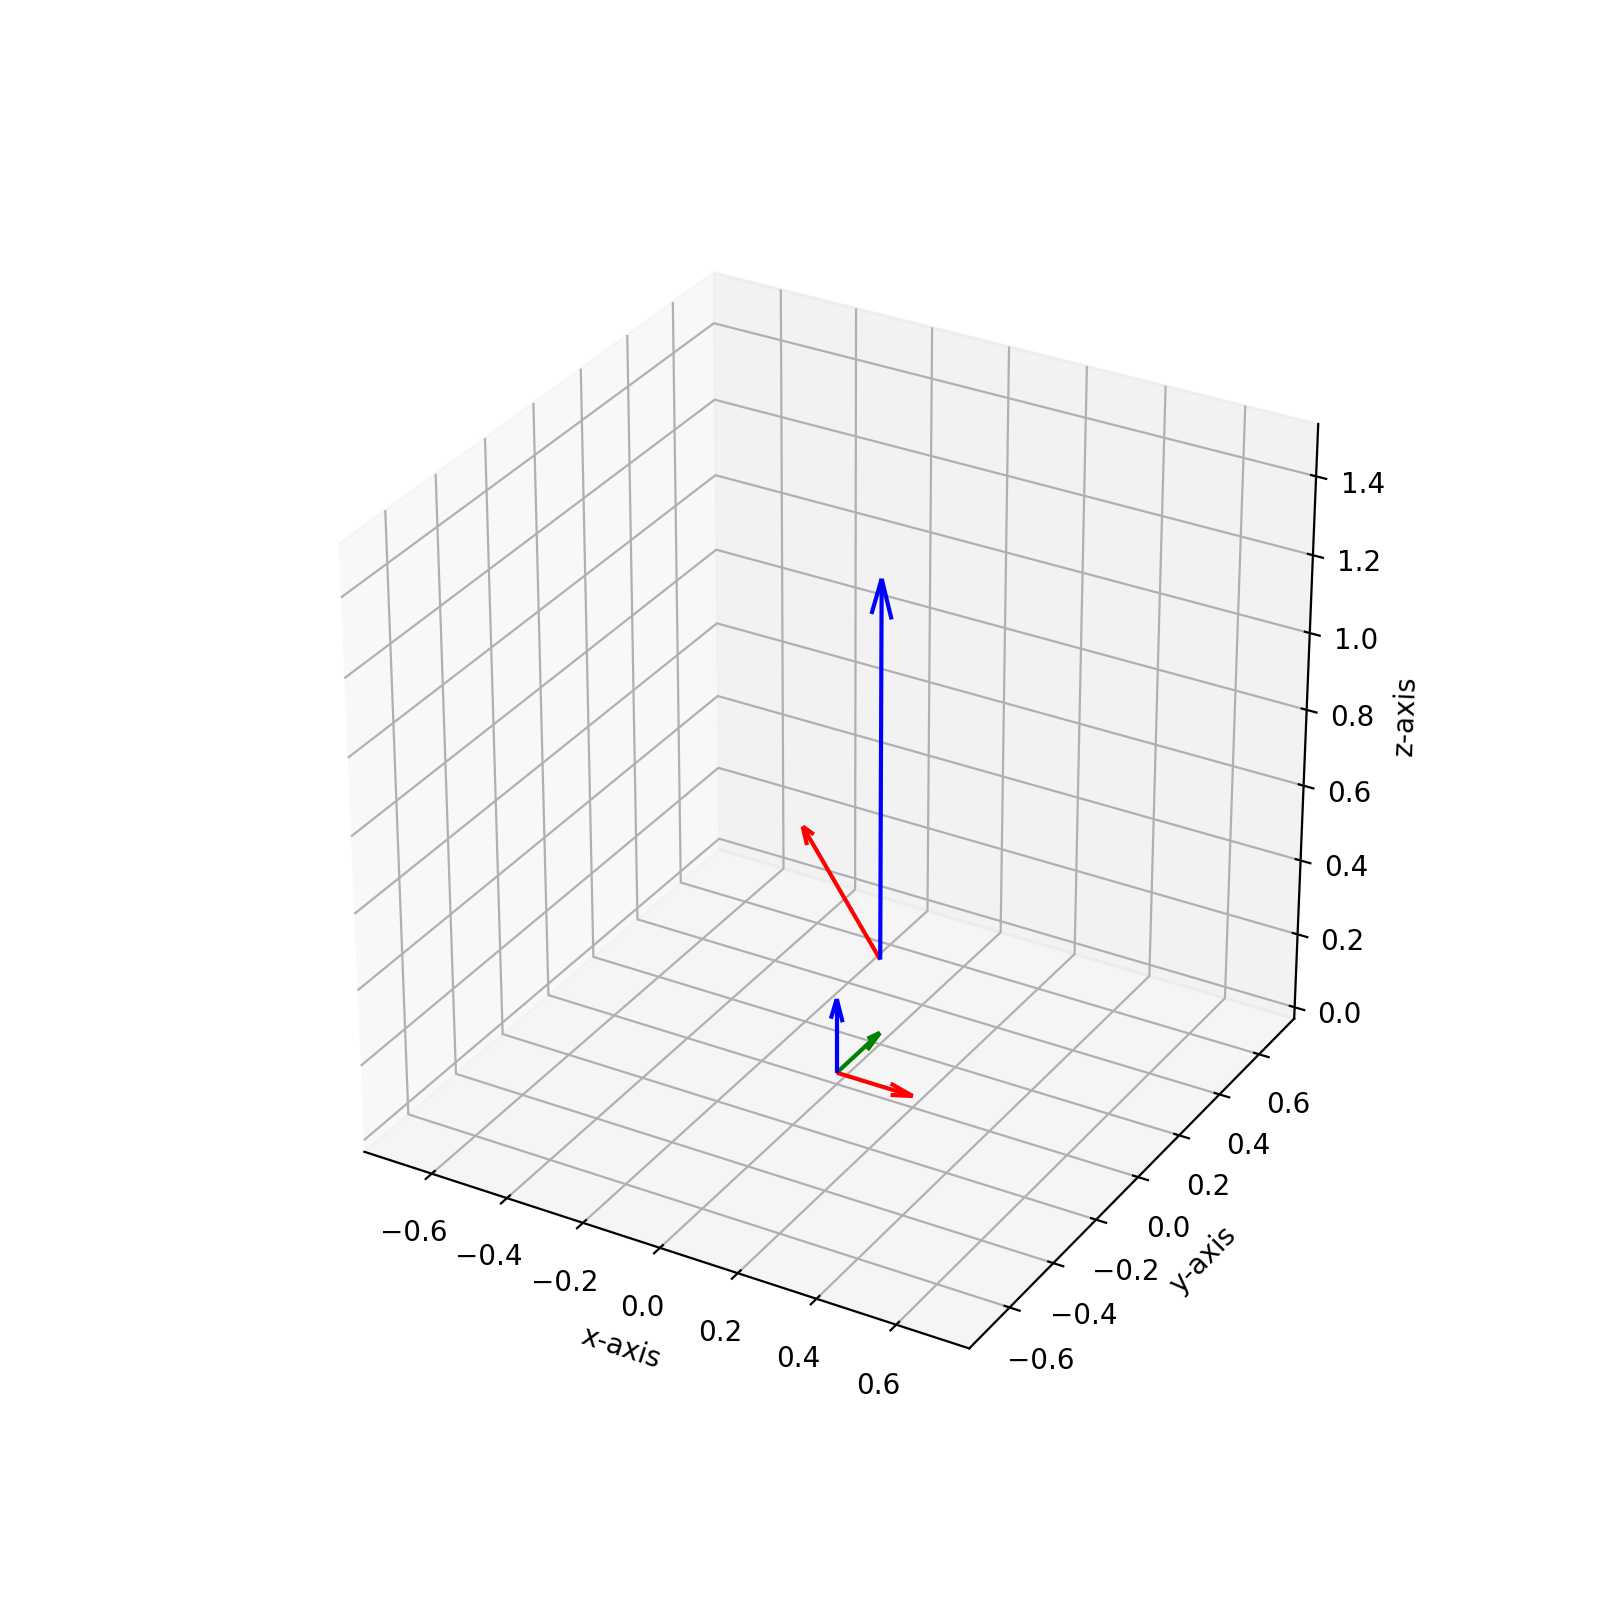

In [34]:
# visualization of the vectors before any work on quaternion
frame_idx = 100

plt.ioff()
fig = plt.figure(figsize=(8,8)) #figsize=(20,20)
ax = fig.add_subplot(projection='3d')
ax.set_aspect('auto') ##############

radius = 1.5

ax.set_xlim3d([-radius/2, radius/2])
ax.set_zlim3d([0, radius])
ax.set_ylim3d([-radius/2, radius/2])
ax.set_xlabel('x-axis')
ax.set_ylabel('y-axis')
ax.set_zlabel('z-axis')

soa1 = v1
soa2 = v2

X, Y, Z = [0, 0.2, 0.2]
U, V, W = soa1
R, S, T = soa2

ax.quiver(X, Y, Z, U, V, W, color='red', arrow_length_ratio=0.1)
ax.quiver(X, Y, Z, R, S, T, color='Blue', arrow_length_ratio=0.1)

ax.quiver(0,0,0,0.2,0,0, color='r') #x-axis
ax.quiver(0,0,0,0,0.2,0, color='g') #y-axis
ax.quiver(0,0,0,0,0,0.2, color='b') #z-axis

plt.show()

In [37]:
# calculation of the rotation matrix with quaternion
rot_matrix = makeRotation(v1, v2)
rot_vec = np.dot(rot_matrix, v1)

<IPython.core.display.Javascript object>


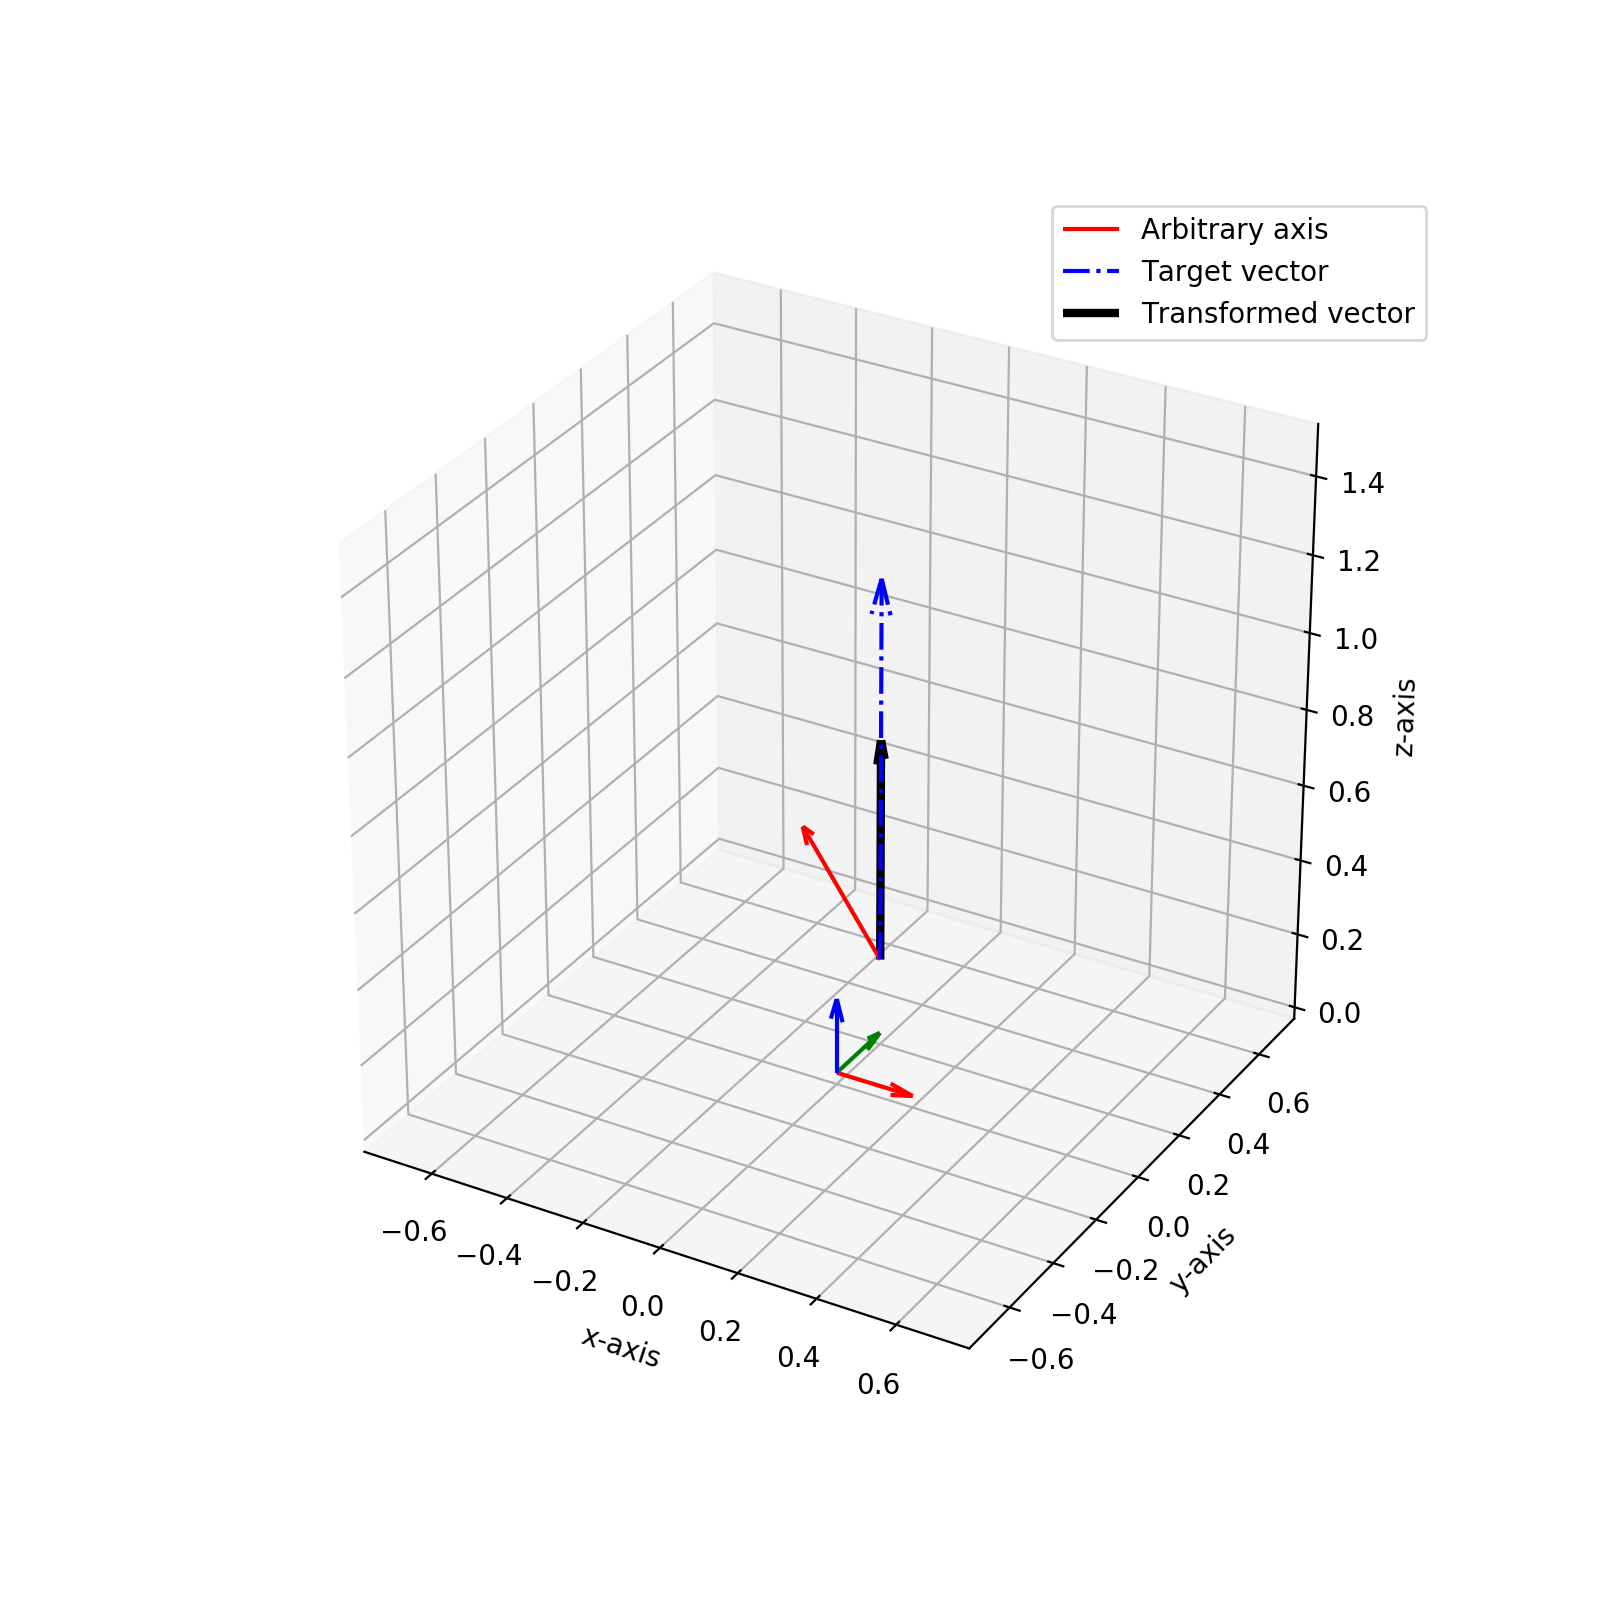

In [38]:
# visualization of quaternion vector
frame_idx = 100

plt.ioff()
fig = plt.figure(figsize=(8,8)) #figsize=(20,20)
ax = fig.add_subplot(projection='3d')
ax.set_aspect('auto') ##############

radius = 1.5

ax.set_xlim3d([-radius/2, radius/2])
ax.set_zlim3d([0, radius])
ax.set_ylim3d([-radius/2, radius/2])
ax.set_xlabel('x-axis')
ax.set_ylabel('y-axis')
ax.set_zlabel('z-axis')

soa1 = v1
soa2 = v2

X, Y, Z = [0, 0.2, 0.2]
U, V, W = soa1
R, S, T = soa2
A, B, C = rot_vec

ax.quiver(X, Y, Z, U, V, W, color='red', arrow_length_ratio=0.1,label='Arbitrary axis')
ax.quiver(X, Y, Z, R, S, T, color='Blue', arrow_length_ratio=0.1, linestyle='dashdot', label='Target vector')
ax.quiver(X, Y, Z, A, B, C, color='k', arrow_length_ratio=0.1, linewidth = 3, label='Transformed vector')

ax.quiver(0,0,0,0.2,0,0, color='r') #x-axis
ax.quiver(0,0,0,0,0.2,0, color='g') #y-axis
ax.quiver(0,0,0,0,0,0.2, color='b') #z-axis

plt.legend()

plt.savefig('./example.png')
plt.show()

### Example of quaternion with multiple vectors (skeleton)

In [27]:
class_name = 'abrun'
file_name = '9'

# uploading 3D human pose estimation data
data_3d = np.load('data/out_pose3D_{}_{}.npy'.format(file_name, class_name))

In [28]:
# human joints fragments
bones_3d = [[0, 1, 0],
            [1, 2, 0],
            [3, 2, 0],
            [0, 4, 1],
            [4, 5, 1],
            [6, 5, 1],
            [0, 7, 1],
            [8, 7, 1],
            [9, 8, 1],
            [10, 9, 1],
            [11, 8, 1],
            [12, 11, 1],
            [12, 13, 1],
            [14, 8, 0],
            [15, 14, 0],
            [15, 16, 0]] #0 == red/right, 1 == black/left

<IPython.core.display.Javascript object>


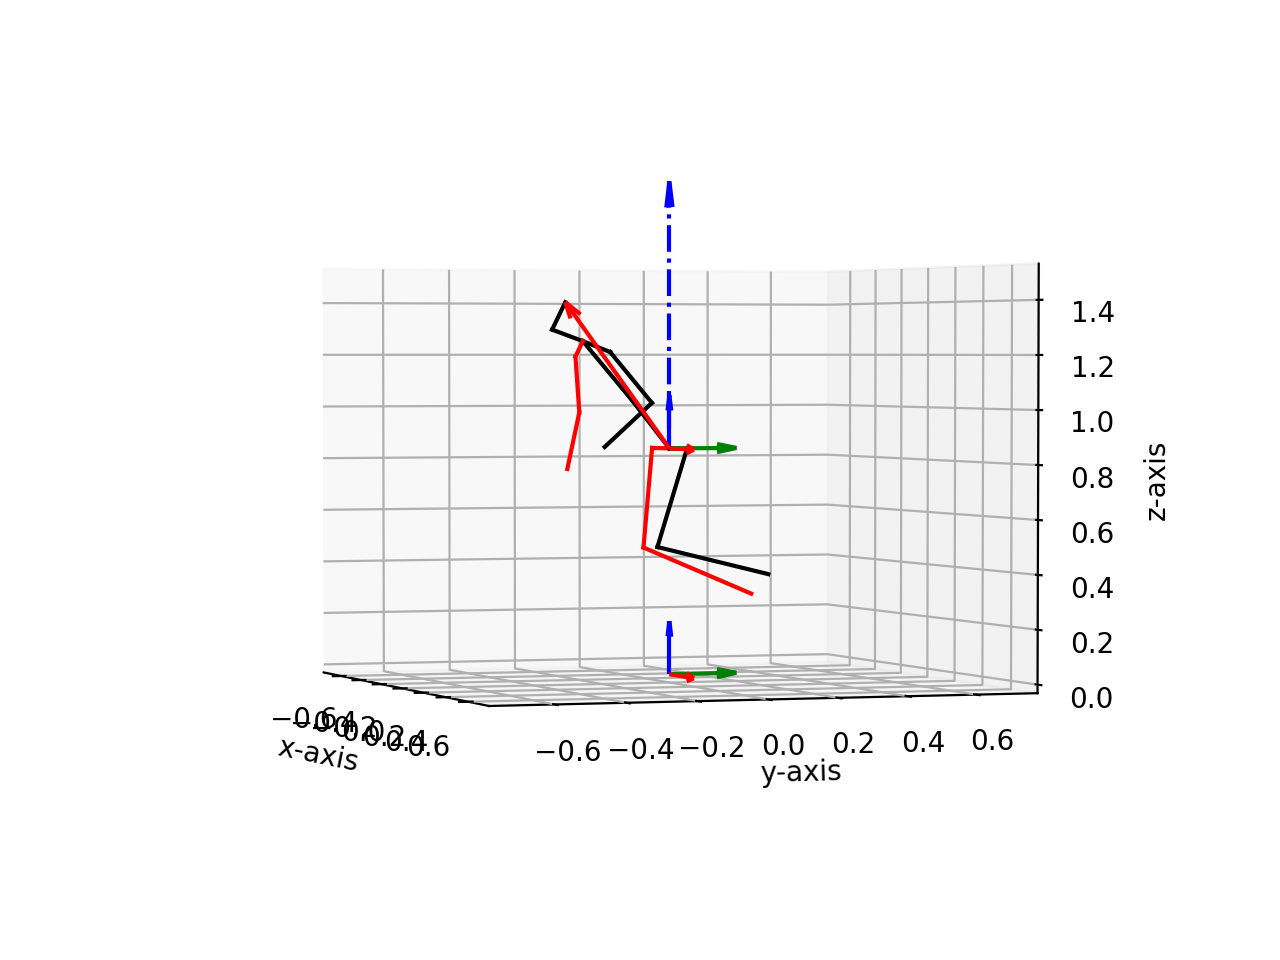

In [29]:
frame_idx = 100 # visualization of no.100 frame

plt.ioff()
fig = plt.figure() #figsize=(20,20)
ax = fig.add_subplot(projection='3d')
ax.set_aspect('auto') ##############

radius = 1.5

ax.set_xlim3d([-radius/2, radius/2])
ax.set_zlim3d([0, radius])
ax.set_ylim3d([-radius/2, radius/2])
ax.set_xlabel('x-axis')
ax.set_ylabel('y-axis')
ax.set_zlabel('z-axis')

# Quaternion according to head-pelvis vector
soa = [data_3d[frame_idx][0][0], data_3d[frame_idx][0][1], data_3d[frame_idx][0][2]] #pelvis(joint#0)
soa1 = data_3d[frame_idx][10]-data_3d[frame_idx][0] #
soa2 = [0,0,1]

X, Y, Z = soa
U, V, W = soa1
R, S, T = soa2
ax.quiver(X, Y, Z, U, V, W, color='red', arrow_length_ratio=0.1)
ax.quiver(X, Y, Z, R, S, T, color='Blue', arrow_length_ratio=0.1, linestyle='dashdot')

# visualization of the original 3D human skeleton
for bone in bones_3d:
    start = bone[0]
    end = bone[1]
    
    if bone[2]==1: col = 'black'
    else: col = 'red'

    x = [(data_3d[frame_idx][start][0]), (data_3d[frame_idx][end][0])]
    y = [(data_3d[frame_idx][start][1]), (data_3d[frame_idx][end][1])]
    z = [(data_3d[frame_idx][start][2]), (data_3d[frame_idx][end][2])]

    ax.plot(x, y, z, c = col)


ax.quiver(0,0,0,0.2,0,0, color='r') #x-axis
ax.quiver(0,0,0,0,0.2,0, color='g') #y-axis
ax.quiver(0,0,0,0,0,0.2, color='b') #z-axis

ax.quiver(data_3d[frame_idx][0][0],data_3d[frame_idx][0][1],data_3d[frame_idx][0][2],0.2,0,0, color='r') #x-axis
ax.quiver(data_3d[frame_idx][0][0],data_3d[frame_idx][0][1],data_3d[frame_idx][0][2],0,0.2,0, color='g') #y-axis
ax.quiver(data_3d[frame_idx][0][0],data_3d[frame_idx][0][1],data_3d[frame_idx][0][2],0,0,0.2, color='b') #z-axis

plt.show()

- quaternion of multiple points

In [30]:
rot_data = []
rot_data.append(data_3d[frame_idx][0])

# calculating rotation matrix of the core vector 
v1 = data_3d[frame_idx][10] - data_3d[frame_idx][0]
v2 = [0,0,1] # z-axis

rot_matrix = makeRotation(v1, v2)

# quaternion of all joints according to the core vector
for i in range(1,17):
    v1 = [data_3d[frame_idx][i] - data_3d[frame_idx][0]]
    v1 = np.asarray(v1)
    rot_vec = np.dot(rot_matrix, v1.transpose())
    
    x = data_3d[frame_idx][0][0]+rot_vec[0]
    y = data_3d[frame_idx][0][1]+rot_vec[1]
    z = data_3d[frame_idx][0][2]+rot_vec[2]
    
    rot_data.append([x[0],y[0],z[0]])
    
rot_data = np.asarray(rot_data)

In [31]:
v = [data_3d[frame_idx][10] - data_3d[frame_idx][0]]
v = np.asarray(v)
core_vec = np.dot(rot_matrix, v.transpose())
core_vec = core_vec / np.linalg.norm(core_vec)

<IPython.core.display.Javascript object>


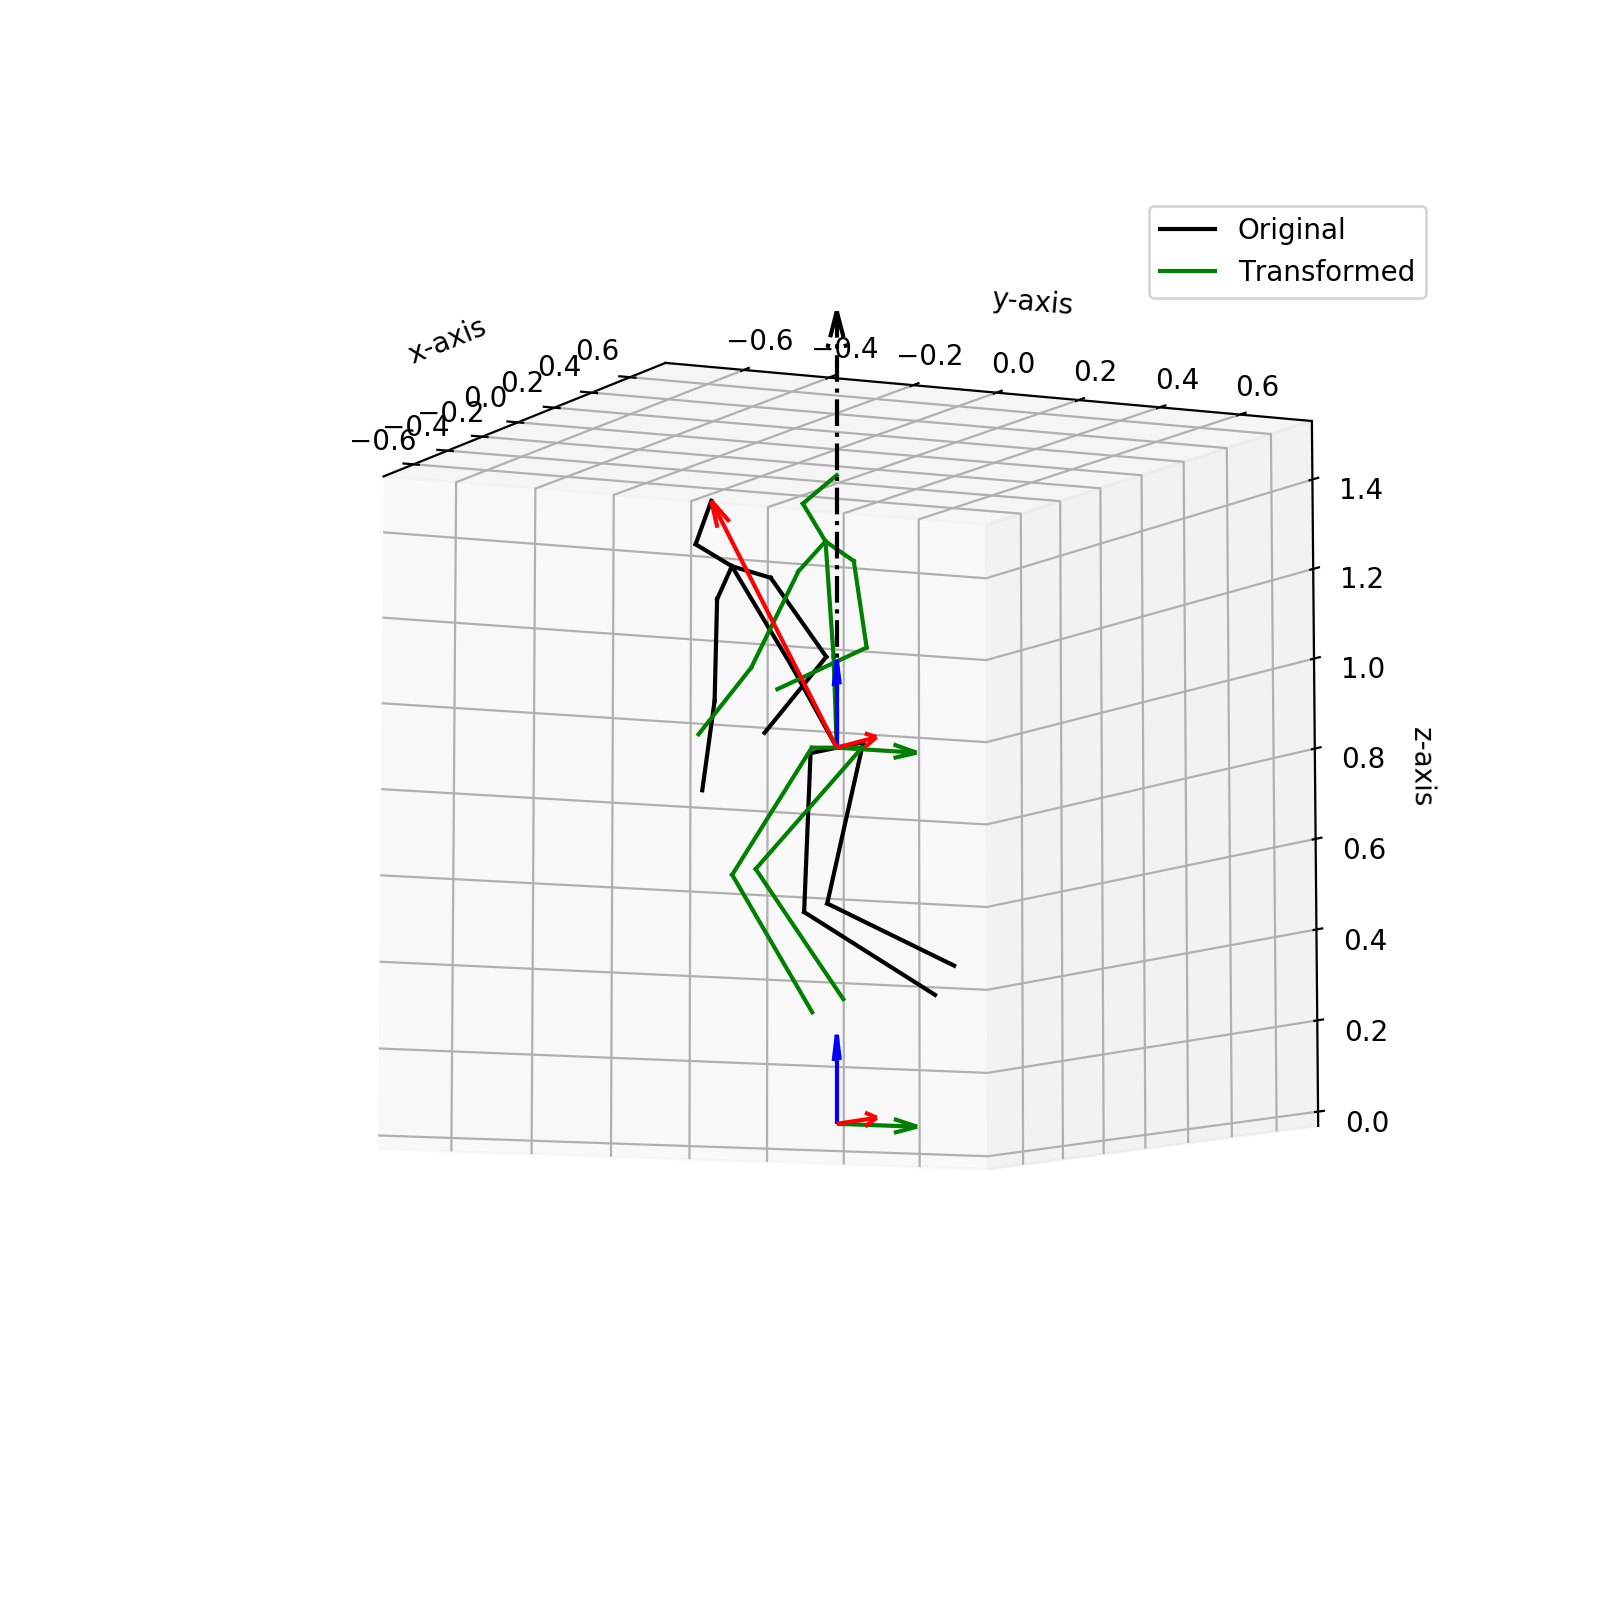

In [32]:
plt.ioff()
fig = plt.figure(figsize=(8,8)) #figsize=(20,20)
ax = fig.add_subplot(projection='3d')
ax.set_aspect('auto') ##############

radius = 1.5

ax.set_xlim3d([-radius/2, radius/2])
ax.set_zlim3d([0, radius])
ax.set_ylim3d([-radius/2, radius/2])
ax.set_xlabel('x-axis')
ax.set_ylabel('y-axis')
ax.set_zlabel('z-axis')

# Quaternion according to head-pelvis vector
soa = [data_3d[frame_idx][0][0], data_3d[frame_idx][0][1], data_3d[frame_idx][0][2]] #pelvis(joint#0)
soa1 = data_3d[frame_idx][10]-data_3d[frame_idx][0] #
soa2 = [0,0,1]

X, Y, Z = soa
U, V, W = soa1
R, S, T = core_vec
ax.quiver(X, Y, Z, U, V, W, color='red', arrow_length_ratio=0.1)
ax.quiver(X, Y, Z, R, S, T, color='k', arrow_length_ratio=0.1, linestyle='dashdot')

# visualization of the original skeleton
for bone in bones_3d:
    start = bone[0]
    end = bone[1]
    
    col = 'black'
    if bone[1] == 16: label = 'Original'
    else: label = '_nolegend_'

    x = [(data_3d[frame_idx][start][0]), (data_3d[frame_idx][end][0])]
    y = [(data_3d[frame_idx][start][1]), (data_3d[frame_idx][end][1])]
    z = [(data_3d[frame_idx][start][2]), (data_3d[frame_idx][end][2])]

    ax.plot(x, y, z, c = col, label=label)

# visualization of the quaternion skeleton
for bone in bones_3d:
    start = bone[0]
    end = bone[1]
    
    col = 'green'
    if bone[1] == 16: label = 'Transformed'
    else: label = '_nolegend_'

    x = [(rot_data[start][0]), (rot_data[end][0])]
    y = [(rot_data[start][1]), (rot_data[end][1])]
    z = [(rot_data[start][2]), (rot_data[end][2])]

    ax.plot(x, y, z, c = col, label=label)

ax.quiver(0,0,0,0.2,0,0, color='r') #x-axis
ax.quiver(0,0,0,0,0.2,0, color='g') #y-axis
ax.quiver(0,0,0,0,0,0.2, color='b') #z-axis

ax.quiver(data_3d[frame_idx][0][0],data_3d[frame_idx][0][1],data_3d[frame_idx][0][2],0.2,0,0, color='r') #x-axis
ax.quiver(data_3d[frame_idx][0][0],data_3d[frame_idx][0][1],data_3d[frame_idx][0][2],0,0.2,0, color='g') #y-axis
ax.quiver(data_3d[frame_idx][0][0],data_3d[frame_idx][0][1],data_3d[frame_idx][0][2],0,0,0.2, color='b') #z-axis

plt.legend(fontsize=10)
plt.show()